In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import numpy
import scipy
import pandas as pd


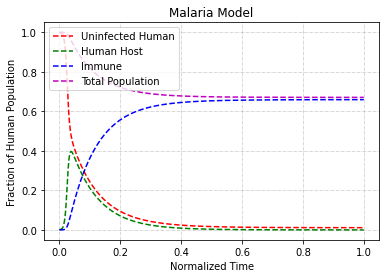

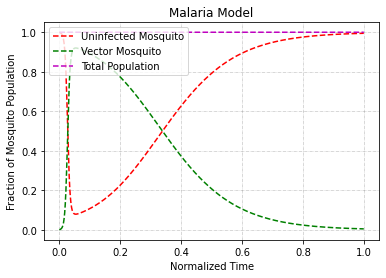

In [3]:
# normal model
p_bit = 0.3
recovery_rate = 0.3 
immunity_rate = 0.01
malaria_death_rate = 0.005
mosquito_birth_rate = 0.01
mosquito_death_rate = 0.01
p_bit_human = 0.3

t_end = 1500
step_size = 1
total_steps= int(t_end/step_size)+1 

unif_human = np.zeros(total_steps)
human_host = np.zeros(total_steps)
immune = np.zeros(total_steps)
unif_mosquito = np.zeros(total_steps)
vector_mosquito = np.zeros(total_steps)

total_human = np.zeros(total_steps)
total_mosquito = np.zeros(total_steps)


unif_human[0]=float(300)
human_host[0]=float(1)
immune[0] = float(0)
unif_mosquito[0] = float(300)
vector_mosquito[0] = float(0)

total_human[0] = 301
total_mosquito[0] = 300

for i in range(1,total_steps):
 
    unif_human[i] = unif_human[i-1] +(recovery_rate*human_host[i-1]  - p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1])*step_size
    
    human_host[i] = human_host[i-1] + (p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - recovery_rate*human_host[i-1] -immunity_rate*human_host[i-1] - malaria_death_rate*human_host[i-1])*step_size
    
    immune[i] = immune[i-1] + immunity_rate*human_host[i-1]*step_size
    
    unif_mosquito[i] = unif_mosquito[i-1] + (mosquito_birth_rate*total_mosquito[i-1] - mosquito_death_rate*unif_mosquito[i-1] - p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1])*step_size

    vector_mosquito[i] = vector_mosquito[i-1] + ( p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - mosquito_death_rate*vector_mosquito[i-1] )*step_size

    total_mosquito[i] = unif_mosquito[i] + vector_mosquito[i]
    total_human[i] =unif_human[i]+human_host[i]+immune[i]

    
x_axis=np.linspace(0,1,total_steps)

plt.figure(1)
plt.plot(x_axis,unif_human/total_human[0],'r--' )
plt.plot(x_axis,human_host/total_human[0],'g--' )
plt.plot(x_axis,immune/total_human[0],'b--' )
plt.plot(x_axis,total_human/total_human[0],'m--')

plt.title('Malaria Model')
plt.ylabel('Fraction of Human Population')
plt.xlabel('Normalized Time')
plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
plt.legend(['Uninfected Human','Human Host','Immune','Total Population'], loc=2)
plt.show()

plt.figure(2)
plt.plot(x_axis,unif_mosquito/total_mosquito[0],'r--' )
plt.plot(x_axis,vector_mosquito/total_mosquito[0],'g--' )
plt.plot(x_axis,total_mosquito/total_mosquito[0],'m--')

plt.title('Malaria Model')
plt.ylabel('Fraction of Mosquito Population')
plt.xlabel('Normalized Time')
plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
plt.legend(['Uninfected Mosquito','Vector Mosquito','Total Population'], loc=2)
plt.show()


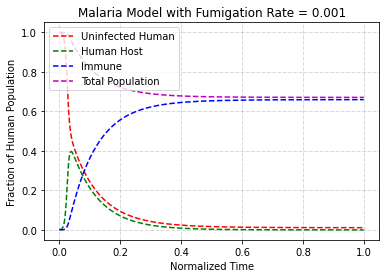

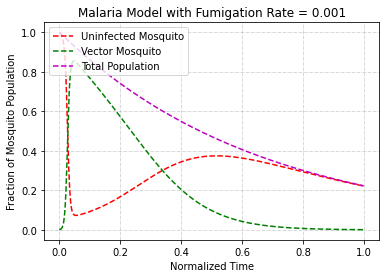

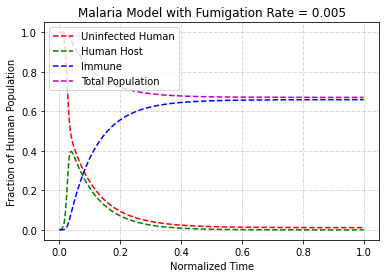

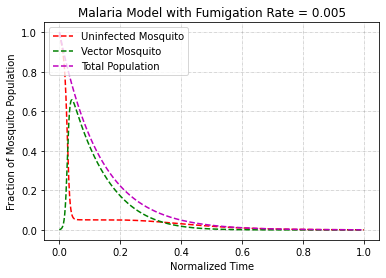

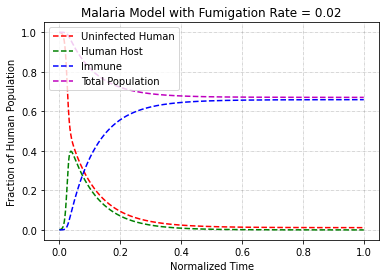

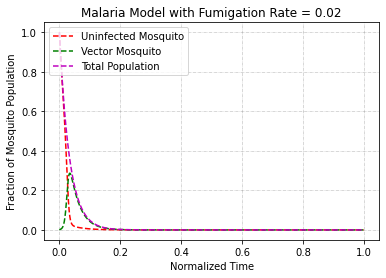

In [4]:
# total fumigation
p_bit = 0.3
recovery_rate = 0.3 
immunity_rate = 0.01
malaria_death_rate = 0.005
mosquito_birth_rate = 0.01
mosquito_death_rate = 0.01
p_bit_human = 0.3
fumigation_death = [0.001 , 0.005 , 0.02]
t_end = 1500
step_size = 1
total_steps= int(t_end/step_size)+1 

unif_human = np.zeros(total_steps)
human_host = np.zeros(total_steps)
immune = np.zeros(total_steps)
unif_mosquito = np.zeros(total_steps)
vector_mosquito = np.zeros(total_steps)

total_human = np.zeros(total_steps)
total_mosquito = np.zeros(total_steps)


unif_human[0]=float(300)
human_host[0]=float(1)
immune[0] = float(0)
unif_mosquito[0] = float(300)
vector_mosquito[0] = float(0)

total_human[0] = 301
total_mosquito[0] = 300
for f in fumigation_death:
    temp = f
    for i in range(1,total_steps):
        unif_human[i] = unif_human[i-1] +(recovery_rate*human_host[i-1]  - p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1])*step_size
        
        human_host[i] = human_host[i-1] + (p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - recovery_rate*human_host[i-1] -immunity_rate*human_host[i-1] - malaria_death_rate*human_host[i-1])*step_size
        
        immune[i] = immune[i-1] + immunity_rate*human_host[i-1]*step_size
        
        unif_mosquito[i] = unif_mosquito[i-1] + (mosquito_birth_rate*total_mosquito[i-1] - mosquito_death_rate*unif_mosquito[i-1] - p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - f*unif_mosquito[i-1])*step_size

        vector_mosquito[i] = vector_mosquito[i-1] + ( p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - mosquito_death_rate*vector_mosquito[i-1] - f*vector_mosquito[i-1] )*step_size

        total_mosquito[i] = unif_mosquito[i] + vector_mosquito[i]
        total_human[i] =unif_human[i]+human_host[i]+immune[i]

        
    x_axis=np.linspace(0,1,total_steps)

    plt.figure(1)
    plt.plot(x_axis,unif_human/total_human[0],'r--' )
    plt.plot(x_axis,human_host/total_human[0],'g--' )
    plt.plot(x_axis,immune/total_human[0],'b--' )
    plt.plot(x_axis,total_human/total_human[0],'m--')

    plt.title('Malaria Model with Fumigation Rate = ' + str(temp))
    plt.ylabel('Fraction of Human Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Human','Human Host','Immune','Total Population'], loc=2)
    plt.show()

    plt.figure(2)
    plt.plot(x_axis,unif_mosquito/total_mosquito[0],'r--' )
    plt.plot(x_axis,vector_mosquito/total_mosquito[0],'g--' )
    plt.plot(x_axis,total_mosquito/total_mosquito[0],'m--')

    plt.title('Malaria Model with Fumigation Rate = ' + str(temp))
    plt.ylabel('Fraction of Mosquito Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Mosquito','Vector Mosquito','Total Population'], loc=2)
    plt.show()


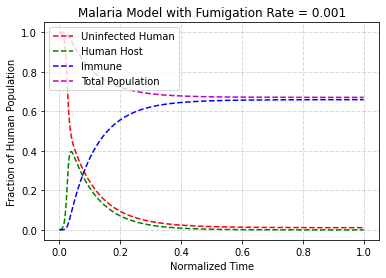

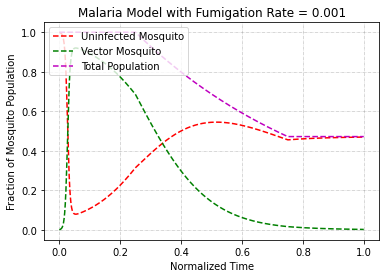

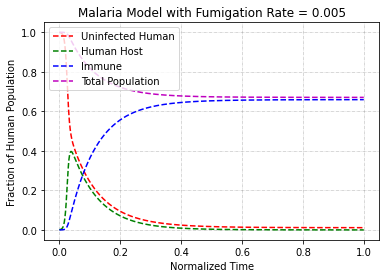

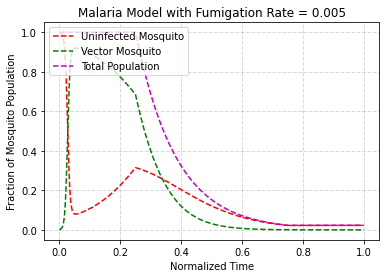

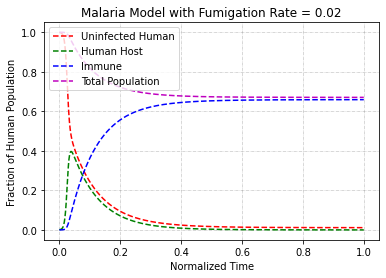

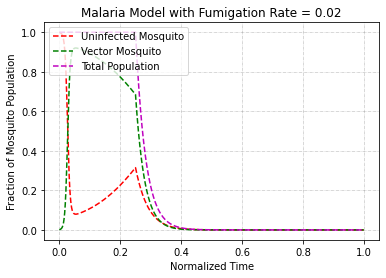

In [5]:
## fumigation from total/4 to 3*total/4
p_bit = 0.3
recovery_rate = 0.3 
immunity_rate = 0.01
malaria_death_rate = 0.005
mosquito_birth_rate = 0.01
mosquito_death_rate = 0.01
p_bit_human = 0.3
fumigation_death = [0.001 , 0.005 , 0.02]
t_end = 1500
step_size = 1
total_steps= int(t_end/step_size)+1 

unif_human = np.zeros(total_steps)
human_host = np.zeros(total_steps)
immune = np.zeros(total_steps)
unif_mosquito = np.zeros(total_steps)
vector_mosquito = np.zeros(total_steps)

total_human = np.zeros(total_steps)
total_mosquito = np.zeros(total_steps)


unif_human[0]=float(300)
human_host[0]=float(1)
immune[0] = float(0)
unif_mosquito[0] = float(300)
vector_mosquito[0] = float(0)

total_human[0] = 301
total_mosquito[0] = 300
for f in fumigation_death:
    temp = f
    for i in range(1,total_steps):
        if(i<total_steps/4 or i>3*total_steps/4):
            f=0
        else:
            f=temp
        unif_human[i] = unif_human[i-1] +(recovery_rate*human_host[i-1]  - p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1])*step_size
        
        human_host[i] = human_host[i-1] + (p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - recovery_rate*human_host[i-1] -immunity_rate*human_host[i-1] - malaria_death_rate*human_host[i-1])*step_size
        
        immune[i] = immune[i-1] + immunity_rate*human_host[i-1]*step_size
        
        unif_mosquito[i] = unif_mosquito[i-1] + (mosquito_birth_rate*total_mosquito[i-1] - mosquito_death_rate*unif_mosquito[i-1] - p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - f*unif_mosquito[i-1])*step_size

        vector_mosquito[i] = vector_mosquito[i-1] + ( p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - mosquito_death_rate*vector_mosquito[i-1] - f*vector_mosquito[i-1] )*step_size

        total_mosquito[i] = unif_mosquito[i] + vector_mosquito[i]
        total_human[i] =unif_human[i]+human_host[i]+immune[i]

        
    x_axis=np.linspace(0,1,total_steps)

    plt.figure(1)
    plt.plot(x_axis,unif_human/total_human[0],'r--' )
    plt.plot(x_axis,human_host/total_human[0],'g--' )
    plt.plot(x_axis,immune/total_human[0],'b--' )
    plt.plot(x_axis,total_human/total_human[0],'m--')

    plt.title('Malaria Model with Fumigation Rate = ' + str(temp))
    plt.ylabel('Fraction of Human Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Human','Human Host','Immune','Total Population'], loc=2)
    plt.show()

    plt.figure(2)
    plt.plot(x_axis,unif_mosquito/total_mosquito[0],'r--' )
    plt.plot(x_axis,vector_mosquito/total_mosquito[0],'g--' )
    plt.plot(x_axis,total_mosquito/total_mosquito[0],'m--')

    plt.title('Malaria Model with Fumigation Rate = ' + str(temp))
    plt.ylabel('Fraction of Mosquito Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Mosquito','Vector Mosquito','Total Population'], loc=2)
    plt.show()


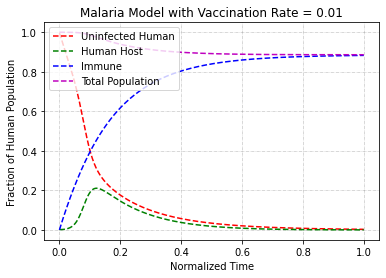

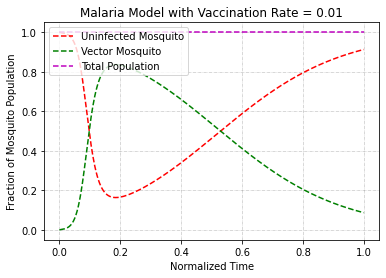

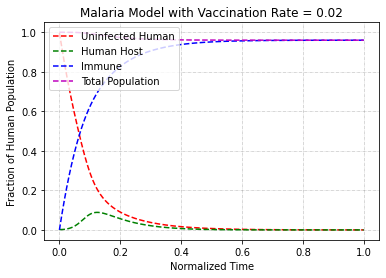

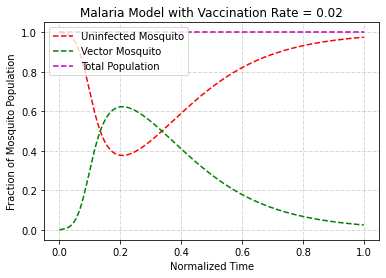

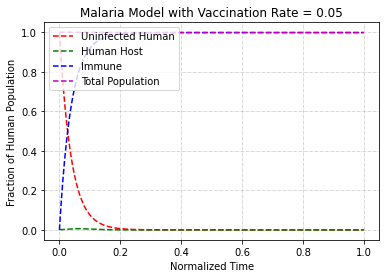

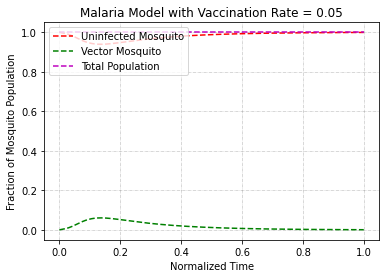

In [6]:
# vaccination
p_bit = 0.3
recovery_rate = 0.3 
immunity_rate = 0.01
malaria_death_rate = 0.005
mosquito_birth_rate = 0.01
mosquito_death_rate = 0.01
p_bit_human = 0.3
vaccination = [0.01 , 0.02 , 0.05]
t_end = 500
step_size = 1
total_steps= int(t_end/step_size)+1 

unif_human = np.zeros(total_steps)
human_host = np.zeros(total_steps)
immune = np.zeros(total_steps)
unif_mosquito = np.zeros(total_steps)
vector_mosquito = np.zeros(total_steps)

total_human = np.zeros(total_steps)
total_mosquito = np.zeros(total_steps)


unif_human[0]=float(300)
human_host[0]=float(1)
immune[0] = float(0)
unif_mosquito[0] = float(300)
vector_mosquito[0] = float(0)

total_human[0] = 301
total_mosquito[0] = 300
for v in vaccination:
    for i in range(1,total_steps):
    
        unif_human[i] = unif_human[i-1] +(recovery_rate*human_host[i-1]  - p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - v*unif_human[i-1])*step_size
        
        human_host[i] = human_host[i-1] + (p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - recovery_rate*human_host[i-1] -immunity_rate*human_host[i-1] - malaria_death_rate*human_host[i-1])*step_size
        
        immune[i] = immune[i-1] + (immunity_rate*human_host[i-1] + v*unif_human[i-1])*step_size
        
        unif_mosquito[i] = unif_mosquito[i-1] + (mosquito_birth_rate*total_mosquito[i-1] - mosquito_death_rate*unif_mosquito[i-1] - p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] )*step_size

        vector_mosquito[i] = vector_mosquito[i-1] + ( p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - mosquito_death_rate*vector_mosquito[i-1]  )*step_size

        total_mosquito[i] = unif_mosquito[i] + vector_mosquito[i]
        total_human[i] =unif_human[i]+human_host[i]+immune[i]

        
    x_axis=np.linspace(0,1,total_steps)

    plt.figure(1)
    plt.plot(x_axis,unif_human/total_human[0],'r--' )
    plt.plot(x_axis,human_host/total_human[0],'g--' )
    plt.plot(x_axis,immune/total_human[0],'b--' )
    plt.plot(x_axis,total_human/total_human[0],'m--')

    plt.title('Malaria Model with Vaccination Rate = ' + str(v))
    plt.ylabel('Fraction of Human Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Human','Human Host','Immune','Total Population'], loc=2)
    plt.show()

    plt.figure(2)
    plt.plot(x_axis,unif_mosquito/total_mosquito[0],'r--' )
    plt.plot(x_axis,vector_mosquito/total_mosquito[0],'g--' )
    plt.plot(x_axis,total_mosquito/total_mosquito[0],'m--')

    plt.title('Malaria Model with Vaccination Rate = ' + str(v))
    plt.ylabel('Fraction of Mosquito Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Mosquito','Vector Mosquito','Total Population'], loc=2)
    plt.show()


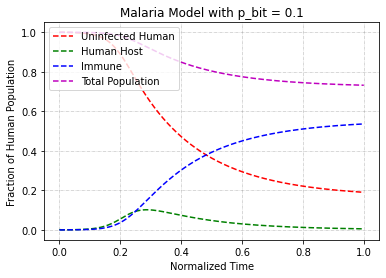

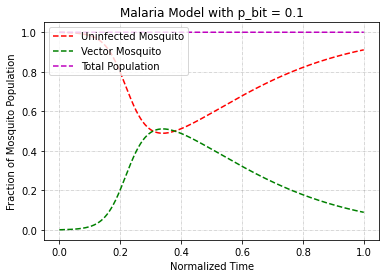

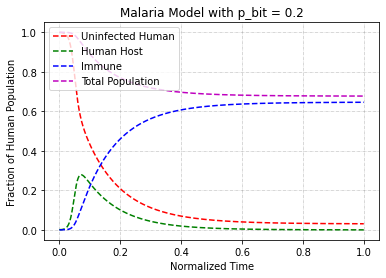

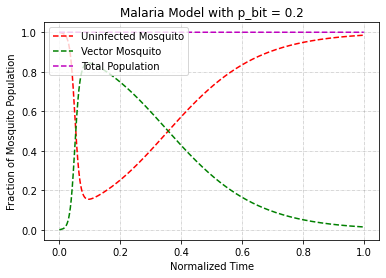

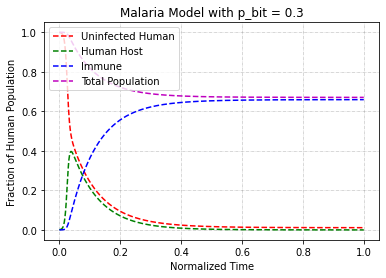

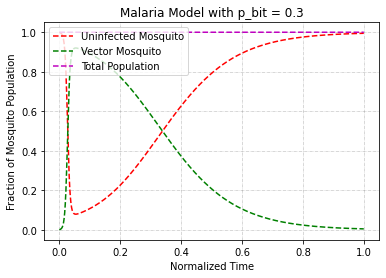

In [7]:
# use mosquito repellant
p_bit_array = [0.1,0.2,0.3]
recovery_rate = 0.3 
immunity_rate = 0.01
malaria_death_rate = 0.005
mosquito_birth_rate = 0.01
mosquito_death_rate = 0.01
p_bit_human = 0.3

t_end = 1500
step_size = 1
total_steps= int(t_end/step_size)+1 

unif_human = np.zeros(total_steps)
human_host = np.zeros(total_steps)
immune = np.zeros(total_steps)
unif_mosquito = np.zeros(total_steps)
vector_mosquito = np.zeros(total_steps)

total_human = np.zeros(total_steps)
total_mosquito = np.zeros(total_steps)


unif_human[0]=float(300)
human_host[0]=float(1)
immune[0] = float(0)
unif_mosquito[0] = float(300)
vector_mosquito[0] = float(0)

total_human[0] = 301
total_mosquito[0] = 300
for p_bit in p_bit_array:
    p_bit_human=p_bit
    for i in range(1,total_steps):
    
        unif_human[i] = unif_human[i-1] +(recovery_rate*human_host[i-1]  - p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1])*step_size
        
        human_host[i] = human_host[i-1] + (p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - recovery_rate*human_host[i-1] -immunity_rate*human_host[i-1] - malaria_death_rate*human_host[i-1])*step_size
        
        immune[i] = immune[i-1] + immunity_rate*human_host[i-1]*step_size
        
        unif_mosquito[i] = unif_mosquito[i-1] + (mosquito_birth_rate*total_mosquito[i-1] - mosquito_death_rate*unif_mosquito[i-1] - p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1])*step_size

        vector_mosquito[i] = vector_mosquito[i-1] + ( p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - mosquito_death_rate*vector_mosquito[i-1] )*step_size

        total_mosquito[i] = unif_mosquito[i] + vector_mosquito[i]
        total_human[i] =unif_human[i]+human_host[i]+immune[i]

        
    x_axis=np.linspace(0,1,total_steps)

    plt.figure(1)
    plt.plot(x_axis,unif_human/total_human[0],'r--' )
    plt.plot(x_axis,human_host/total_human[0],'g--' )
    plt.plot(x_axis,immune/total_human[0],'b--' )
    plt.plot(x_axis,total_human/total_human[0],'m--')

    plt.title('Malaria Model with p_bit = '+str(p_bit))
    plt.ylabel('Fraction of Human Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Human','Human Host','Immune','Total Population'], loc=2)
    plt.show()

    plt.figure(2)
    plt.plot(x_axis,unif_mosquito/total_mosquito[0],'r--' )
    plt.plot(x_axis,vector_mosquito/total_mosquito[0],'g--' )
    plt.plot(x_axis,total_mosquito/total_mosquito[0],'m--')

    plt.title('Malaria Model with p_bit = ' +str(p_bit))
    plt.ylabel('Fraction of Mosquito Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Mosquito','Vector Mosquito','Total Population'], loc=2)
    plt.show()


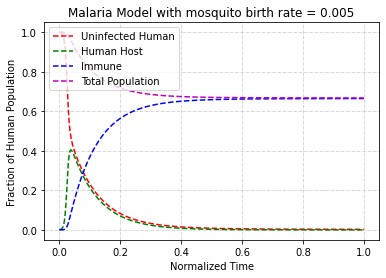

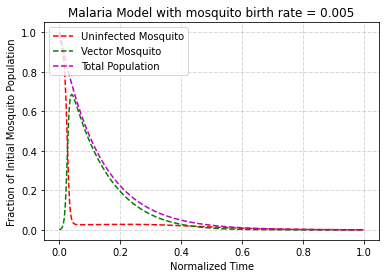

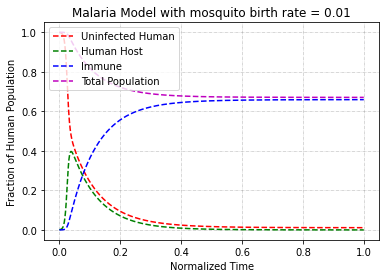

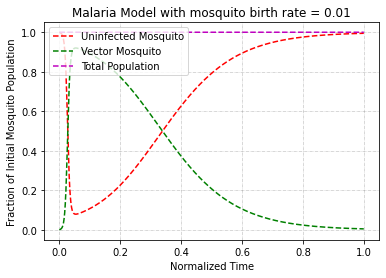

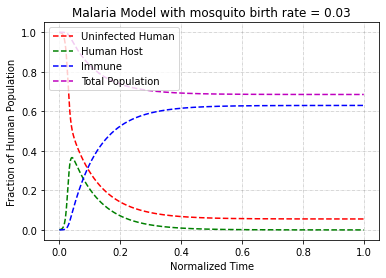

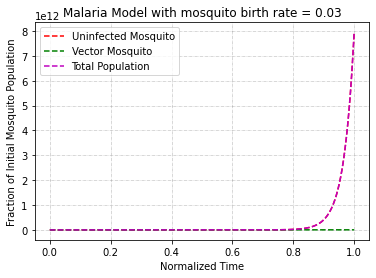

In [8]:
# reduce birth rate by vector control

p_bit = 0.3
recovery_rate = 0.3 
immunity_rate = 0.01
malaria_death_rate = 0.005
mosquito_birth_rate_array = [0.005,0.01,0.03]
mosquito_death_rate = 0.01
p_bit_human = 0.3

t_end = 1500
step_size = 1
total_steps= int(t_end/step_size)+1 

unif_human = np.zeros(total_steps)
human_host = np.zeros(total_steps)
immune = np.zeros(total_steps)
unif_mosquito = np.zeros(total_steps)
vector_mosquito = np.zeros(total_steps)

total_human = np.zeros(total_steps)
total_mosquito = np.zeros(total_steps)


unif_human[0]=float(300)
human_host[0]=float(1)
immune[0] = float(0)
unif_mosquito[0] = float(300)
vector_mosquito[0] = float(0)

total_human[0] = 301
total_mosquito[0] = 300
for mosquito_birth_rate in mosquito_birth_rate_array:
    for i in range(1,total_steps):
    
        unif_human[i] = unif_human[i-1] +(recovery_rate*human_host[i-1]  - p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1])*step_size
        
        human_host[i] = human_host[i-1] + (p_bit*vector_mosquito[i-1]*unif_human[i-1]/total_mosquito[i-1] - recovery_rate*human_host[i-1] -immunity_rate*human_host[i-1] - malaria_death_rate*human_host[i-1])*step_size
        
        immune[i] = immune[i-1] + immunity_rate*human_host[i-1]*step_size
        
        unif_mosquito[i] = unif_mosquito[i-1] + (mosquito_birth_rate*total_mosquito[i-1] - mosquito_death_rate*unif_mosquito[i-1] - p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1])*step_size

        vector_mosquito[i] = vector_mosquito[i-1] + ( p_bit_human*unif_mosquito[i-1]*human_host[i-1]/total_human[i-1] - mosquito_death_rate*vector_mosquito[i-1] )*step_size

        total_mosquito[i] = unif_mosquito[i] + vector_mosquito[i]
        total_human[i] =unif_human[i]+human_host[i]+immune[i]

        
    x_axis=np.linspace(0,1,total_steps)

    plt.figure(1)
    plt.plot(x_axis,unif_human/total_human[0],'r--' )
    plt.plot(x_axis,human_host/total_human[0],'g--' )
    plt.plot(x_axis,immune/total_human[0],'b--' )
    plt.plot(x_axis,total_human/total_human[0],'m--')

    plt.title('Malaria Model with mosquito birth rate = '+ str(mosquito_birth_rate))
    plt.ylabel('Fraction of Human Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Human','Human Host','Immune','Total Population'], loc=2)
    plt.show()

    plt.figure(2)
    plt.plot(x_axis,unif_mosquito/total_mosquito[0],'r--' )
    plt.plot(x_axis,vector_mosquito/total_mosquito[0],'g--' )
    plt.plot(x_axis,total_mosquito/total_mosquito[0],'m--')

    plt.title('Malaria Model with mosquito birth rate = '+ str(mosquito_birth_rate))
    plt.ylabel('Fraction of Initial Mosquito Population')
    plt.xlabel('Normalized Time')
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.legend(['Uninfected Mosquito','Vector Mosquito','Total Population'], loc=2)
    plt.show()
